Text(0,0.5,'$x_2$')

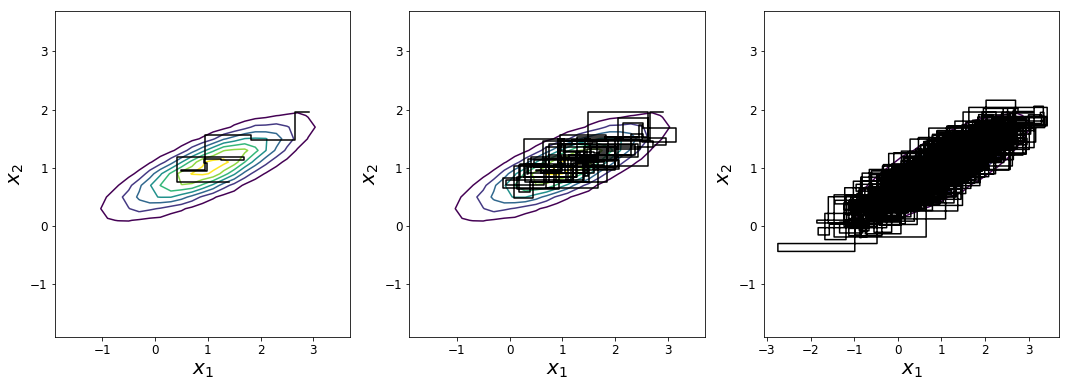

In [6]:
#Now do it with Gibbs sampler
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

#solution1: directly generate random numbers from 2D normal distribution
#set parameters
mu = np.array([1.,1.])   #mean
s1 = 1.   #sigma_1^2
s2 = 0.2  #sigma_2^2
rho = 0.8 #rho
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]]) #covariance matrix
#random samples saved in xx
xx = np.random.multivariate_normal(mu,sig,100000)
#make 2d histogram
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[:-1]+xgrid[1:])/2.
ycenter = (ygrid[:-1]+ygrid[1:])/2.
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])



#solution2: use Gibbs sampler to generate random numbers from 2D normal distribution
#set parameters
mu = np.array([1.,1.])   #mean
s1 = 1.   #sigma_1^2
s2 = 0.2  #sigma_2^2
rho = 0.8 #rho

#number of steps
N = 100000
#every step (both dimensions changed)stored in xx_g
xx_g = np.zeros((N,2))
#every change in one dimension stored in xx_g1
xx_g1 = np.zeros((N*2,2))

#initialize the first step [0]
xx_g[0,0]= np.random.uniform(-3,3)  #use uniform distribution to generate first number g[0,0]
xx_g[0,1] = np.random.normal(mu[1]+rho*np.sqrt(s2/s1)*(xx_g[0,0]-mu[0]),np.sqrt(s2*(1-rho**2))) #g[0,0] produce g[0,1]
xx_g1[0] = xx_g[0]
#implement the sampler, from step [1] to [100000]
for i in range(1,N):
    xx_g[i,0] = np.random.normal(mu[0]+rho*np.sqrt(s1/s2)*(xx_g[i-1,1]-mu[1]),np.sqrt(s1*(1-rho**2))) #g[i-1,1] produce g[i,0]
    xx_g1[2*i-1,0] = xx_g[i,0]     #renew g[i,0] in g1[2i-1,0] 
    xx_g1[2*i-1,1] = xx_g[i-1,1]   #keep unchanged g[i-1,1] in g1[2i-1,1]
    xx_g[i,1] = np.random.normal(mu[1]+rho*np.sqrt(s2/s1)*(xx_g[i,0]-mu[0]),np.sqrt(s2*(1-rho**2))) #g[i,0] produce g[i,1]
    xx_g1[2*i,0] = xx_g[i,0]       #keep unchanged g[i,0] in g1[2i,0]
    xx_g1[2*i,1] = xx_g[i,1]       #renew g[i,1] in g1[2i,1]

#use xx_g to make 2d histogram
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[:-1]+xgrid[1:])/2.
ycenter = (ygrid[:-1]+ygrid[1:])/2.
hxx_g,xedge,yedge = np.histogram2d(xx_g[:,0],xx_g[:,1],bins=[xgrid,ygrid])

#show the figure of random walking
#the first 10 steps (20 changes)
fig = plt.figure(figsize=[18,6])
ax = fig.add_subplot(131) 
ax.plot(xx_g1[:20,0],xx_g1[:20,1],'k') 
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
#the first 100 steps (200 changes)
ax = fig.add_subplot(132) 
ax.plot(xx_g1[:200,0],xx_g1[:200,1],'k')
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
#the first 1000 steps (2000 changes)
ax = fig.add_subplot(133)
ax.plot(xx_g1[:2000,0],xx_g1[:2000,1],'k')
ax.contour(xcenter,ycenter,hxx_g.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

#fig.savefig('Gibbs_sampler.png',bbox_inches='tight')